In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
while True:
    responce = input('Hello, please tell us which kind of machine learning method you need.\
    (R : regression, C: classifier)')
    if responce.upper() == 'R':
        task = 'Regression'
        break
    elif responce.upper() == 'C':
        task = 'Classifier'
        break

In [68]:
file_name= input('what is the name of your csv file?\
                  make sure you have uploaded it')
file_name = file_name + '.csv'
df = pd.read_csv(file_name)

In [4]:
df.head()
def var_choose():
    global independ_var
    while True:
        independ_var= input('This is the first 5 rows of dataset\
                     your variables list are the columns names,which one do you want\
                      to consider as the independent variable?')
        
        if independ_var in list(df):
            print(f'ok.you have chosen "{independ_var}" as independent variable')
            break
        else:
            print('you did not choose a correct column name,please check it again')
    
var_choose();


ok.you have chosen "sales" as independent variable


In [5]:
independ_var

'sales'

In [9]:
continue_index= len(df[independ_var].unique())
'''
Mehtod I used here for recognize categorical data is counting its unique values, 
If it is more than 10 we will check it again becouse it sounds countinus. Furthermore, it is not
look like countinus if unique values is less than 6.
'''
if continue_index < 6 and task == 'Regression' :
   ans_count= input('It seems that your independent variable is not Countinous!\
           Are you sure you want to continue? (Y:Yes, N:No,I want check again)')
   if ans_count.upper() == 'Y':
      pass
   if ans_count.upper() == 'N':
      var_choose()
if continue_index > 10 and task == 'Classifier' :
   ans_count= input('It seems that your independent variable is not Categorial!\
           Are you sure you want to continue? (Y:Yes, N:No,I want check again)')
   if ans_count.upper() == 'Y':
      pass
   if ans_count.upper() == 'N':
      var_choose()


In [10]:
if df.isnull().values.any():
    non_names= df.columns[df.isnull().any()].tolist()
    print(f'These columns has Non-values: {non_names}')
    print('please fill in them and return to app')
#need to exit app here 


In [72]:
ds= df.drop([independ_var],axis=1)
str_list = list(ds.select_dtypes(include=['object']).columns)
if len(str_list) > 0:
    print(f'These columns have str data type and need to create dummys:{str_list}')
    create_dummy= input('Do you want we create it in app? (Y:yes ,N:no)')
    if create_dummy.upper() == 'Y':
      df_1=df.drop(str_list,axis=1)
      df_2=pd.get_dummies(df[str_list],drop_first=True)
      df= pd.concat([df_1,df_2], axis=1)
    if create_dummy.upper() == 'N':
      print('please convert string type data to dummys yourself and return to app')
#need to exit app here



In [6]:
#starting to ML 
X=df.drop([independ_var],axis=1)
y=df[independ_var]


In [8]:
'''
Here instead of correlation value, I used t-student value to drop variablse which have not effective
impact on our final Regression Model.According to the table critical value for trusting more than
95% is about 1.85
'''
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
datasery = model.tvalues.where(abs(model.tvalues) < 1.85).dropna()
datasery = list(datasery.keys())
X=X.drop(datasery,axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
model_lir = LinearRegression()
model_lir.fit(X_train,y_train)

LinearRegression()

In [12]:
#LiR Model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_predict = model_lir.predict(X_test)
MAE_LiR= mean_absolute_error(y_true=y_test,y_pred=test_predict)
RMSE_LiR = np.sqrt(mean_squared_error(y_true=y_test,y_pred=test_predict))
tolerance_LiR = RMSE_LiR/y.mean()
score_modeL_LiR = r2_score(y_true=y_test,y_pred=test_predict)
print('These are report for LiR(Linear Regression Model):')
print(f'MAE = {MAE_LiR}')
print(f'RMSE = {RMSE_LiR} (lower is better)')
print(f'Score = {score_modeL_LiR} (higher is better)')
print(f'Tolerance = {tolerance_LiR}')

These are report for LiR(Linear Regression Model):
MAE = 1.2137457736144812
RMSE = 1.5161519375993882 (lower is better)
Score = 0.9185780903322445 (higher is better)
Tolerance = 0.10812279818858178


In [13]:
#Lasso Model
from sklearn.linear_model import LassoCV
lasso_model_cv = LassoCV(eps=0.1,n_alphas=100,cv=10)
lasso_model_cv.fit(X_train,y_train)
lasso_test_predict = lasso_model_cv.predict(X_test)
MAE_lasso = mean_absolute_error(y_true=y_test,y_pred=lasso_test_predict)
RMSE_lasso = np.sqrt(mean_squared_error(y_true=y_test,y_pred=lasso_test_predict))
score_model_lasso = lasso_model_cv.score(X_test,y_test)
tolerance_lasso = RMSE_lasso/y.mean()
print('These are report for Lasso(Linear regression with L1 regularization Model):')
print(f'Alpha = {lasso_model_cv.alpha_}')
print(f'MAE = {MAE_lasso}')
print(f'RMSE = {RMSE_lasso} (lower is better)')
print(f'Score= {lasso_model_cv.score(X_test,y_test)} (higher is better)')
print(f'Tolerance = {tolerance_lasso}')

These are report for Lasso(Linear regression with L1 regularization Model):
Alpha = 0.39636306046337183
MAE = 1.2873601365766174
RMSE = 1.6945833070327798 (lower is better)
Score= 0.8982857780304856 (higher is better)
Tolerance = 0.12084744567892884


In [14]:
#Ridg CV Model
from sklearn.linear_model import RidgeCV
ridge_model_CV = RidgeCV(alphas=(0.1,0.5,1,5,10),scoring='neg_mean_squared_error')
ridge_model_CV.fit(X_train,y_train)
ridge_model_CV.alpha_
test_predict = ridge_model_CV.predict(X_test)
MAE_ridgcv = mean_absolute_error(y_true=y_test,y_pred=test_predict)
RMSE_ridgcv = np.sqrt(mean_squared_error(y_true=y_test,y_pred=test_predict))
tolerance_ridgcv = RMSE_ridgcv/y.mean()
score_model_ridgcv = r2_score(y_true=y_test,y_pred=test_predict)
print('These are report for Ridge CV(Linear regression with L2 regularization Model):')
print('(We have used cross validation to find best alpha)')
print(f'Alpha = {ridge_model_CV.alpha_}')
print(f'MAE = {MAE_ridgcv}')
print(f'RMSE = {RMSE_ridgcv} (lower is better)')
print(f'Score = {score_model_ridgcv} (higher is better)')
print(f'Tolerance = {tolerance_ridgcv}')


These are report for Ridge CV(Linear regression with L2 regularization Model):
(We have used cross validation to find best alpha)
Alpha = 0.5
MAE = 1.2153192836606341
RMSE = 1.5194105608049513 (lower is better)
Score = 0.9182277185209243 (higher is better)
Tolerance = 0.10835518351256561


In [15]:
#Elastic Net Model
from sklearn.linear_model import ElasticNetCV
elastic_model_cv = ElasticNetCV(l1_ratio=[0.001,0.005,0.1,0.5,0.7,0.9,0.95,0.99,1],tol=0.0001,max_iter=1_000_000)
elastic_model_cv.fit(X_train,y_train)
elastic_test_predict = elastic_model_cv.predict(X_test)
MAE_elastic = mean_absolute_error(y_test,elastic_test_predict)
RMSE_elastic = np.sqrt(mean_squared_error(y_test,elastic_test_predict))
score_model_elastic= elastic_model_cv.score(X_test,y_test)
tolerance_elastic = RMSE_elastic/y.mean()
print('These are report for Elastic(Linear regression with L2&L1 regularization Model):')
print(f'Alpha = {(elastic_model_cv.alpha_)}')
print(f'Ratio = {(elastic_model_cv.l1_ratio_)}')
print(f'MAE = {(MAE_elastic)}')
print(f'RMSE = {(RMSE_elastic)} (lower is better)')
print(f'Score= {elastic_model_cv.score(X_test,y_test)} (higher is better)')
print(f'Tolerance = {(tolerance_elastic)}')


These are report for Elastic(Linear regression with L2&L1 regularization Model):
Alpha = 0.0915650077992293
Ratio = 1.0
MAE = 1.2219770611672518
RMSE = 1.5422275252366315 (lower is better)
Score= 0.9157533319458527 (higher is better)
Tolerance = 0.10998235159469648


In [16]:
#SVM Model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR,LinearSVR
base_svr_model = SVR()
param_grid = {'C': [0.001,0.01,0.1,0.5,1,5,10,100],
              'kernel' : ['linear', 'poly', 'rbf'],
              'degree' : [2,3,4],
              'epsilon' : [0,0.01,0.1,0.5,1,2],
              'gamma' : ['scale', 'auto']}
grid_SVR = GridSearchCV(estimator=base_svr_model,param_grid=param_grid)
grid_SVR.fit(X_train,y_train)
grid_SVR_pred = grid_SVR.predict(X_test)
MAE_svm = mean_absolute_error(y_true=y_test, y_pred=grid_SVR_pred)
RMSE_svm = np.sqrt(mean_squared_error(y_true=y_test, y_pred=grid_SVR_pred))
score_svm = r2_score(y_true=y_test, y_pred=grid_SVR_pred)
print('These are report for SVM(Support vector machine Model):')
print(f'Best Hyperparameters are: {grid_SVR.best_estimator_}')
print(f"MAE = {MAE_svm}\nRMSE = {RMSE_svm}\nScore = {score_svm}")


These are report for SVM(Support vector machine Model):
Best Hyperparameters are: SVR(C=10, degree=2, gamma='auto')
MAE = 0.525948125192701
RMSE = 0.7753282521180318
Score = 0.9787074805566361


In [17]:
score_list_regres= {"Lir": score_modeL_LiR,'Ridgecv': score_model_ridgcv,\
             'Lasso': score_model_lasso,'Elastic': score_model_elastic,'SVM': score_svm}
print(f'Based on our calculation, the best model is {max(score_list_regres)}')  
print(f'And Its R2-Score is {max(score_list_regres.values())}')

Based on our calculation, the best model is SVM
And Its R2-Score is 0.9787074805566361


In [22]:
reg_models={'SVM': grid_SVR,'Elastic': elastic_model_cv,'Lasso':lasso_model_cv,\
    'Ridgecv':ridge_model_CV,'Lir':model_lir}
job_key =  max(score_list_regres)  
selected_model= reg_models.get(job_key)


In [26]:
selected_model.fit(X,y)
from joblib import dump
dump(selected_model,'Regression_predictor.joblib')
print('your final prediction final is ready as ((Regression_predictor)) in directory')

['Regression_ml.joblib']

Models best hyperparameters are:
{'C': 0.1, 'penalty': 'l1'}
Result for Logistic regression Model with grid search for reularization and colorfull confusion Matrix:
Summery of classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



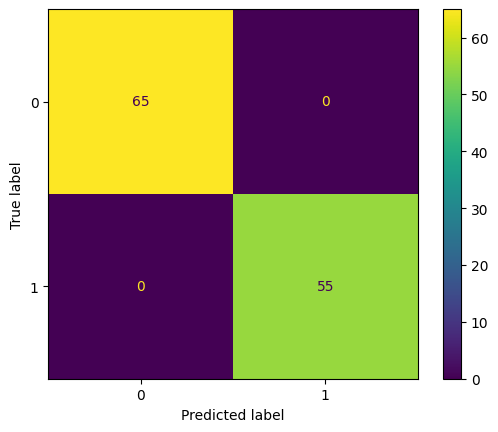

In [73]:
#LoR Model
from sklearn.linear_model import LogisticRegression
Log_model_cv = LogisticRegression(solver='saga',multi_class='auto', max_iter=5000)
penalty = ['l1','l2']
C = np.linspace(0.1,4,10)
from sklearn.model_selection import GridSearchCV
grid_model_cv = GridSearchCV(Log_model_cv,param_grid={'C':C,'penalty':penalty})
grid_model_cv.fit(X_train,y_train)
grid_y_pred = grid_model_cv.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
confusion_matrix(y_true = y_test, y_pred = grid_y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
print(f'Models best hyperparameters are:\n{grid_model_cv.best_params_}')
print('Result for Logistic regression Model with grid search for reularization and colorfull confusion Matrix:')
grid_model_cv_Confusion_matrix = ConfusionMatrixDisplay.from_estimator(grid_model_cv,X_test,y_test)
print('Summery of classification report:')
print(classification_report(y_test,grid_y_pred))

Models best hyperparameters are:
{'knn__n_neighbors': 1}
Result for KNN with gridsearch Model and colorfull confusion Matrix:
Summery of classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



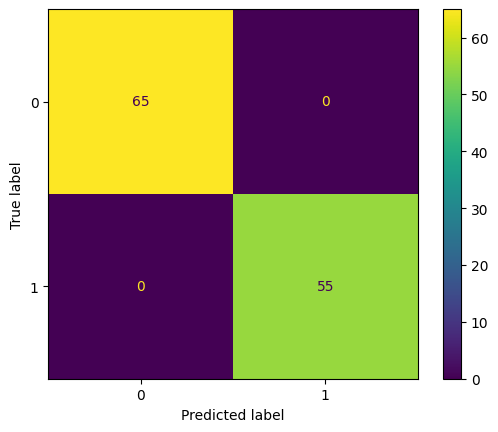

In [66]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)
k_values = list(range(1,30))
from sklearn.model_selection import GridSearchCV
param_grid_knn = {'knn__n_neighbors' : k_values}
knn_model_cv = GridSearchCV(estimator=pipe,param_grid=param_grid_knn,scoring='accuracy')
knn_model_cv.fit(X_train,y_train)
y_pred_knncv = knn_model_cv.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
confusion_matrix(y_true = y_test, y_pred = y_pred_knncv)
from sklearn.metrics import ConfusionMatrixDisplay
print(f'Models best hyperparameters are:\n{knn_model_cv.best_params_}')
print('Result for KNN with gridsearch Model and colorfull confusion Matrix:')
confusion_matrix_plot = ConfusionMatrixDisplay.from_estimator(knn_model_cv,X_test,y_test)
print('Summery of classification report:')
print(classification_report(y_test,y_pred_knncv))

Models best hyperparameters are:
{'C': 0.005, 'kernel': 'linear'}
Result for SVC Model with grid search for best hyperparameters and colorfull confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



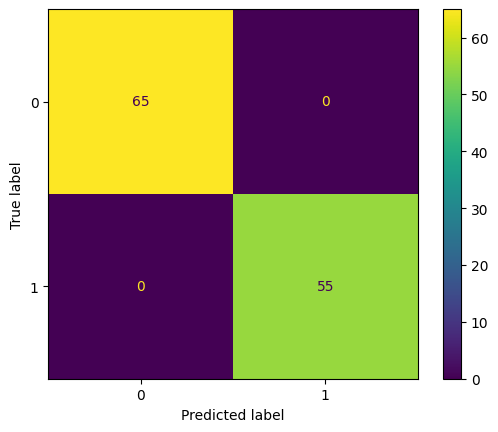

In [65]:
#SVC Model
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C': [0.001,0.005,0.01,0.05,1,5,10,50,100,500,1000,5000],'kernel':['linear','rbf']}
grid_svc = GridSearchCV(svm,param_grid=param_grid)
grid_svc.fit(X_train,y_train)
y_pred_svccv = grid_svc.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
print(f'Models best hyperparameters are:\n{grid_svc.best_params_}')
print('Result for SVC Model with grid search for best hyperparameters and colorfull confusion Matrix:')
svc_model_cv_Confusion_matrix = ConfusionMatrixDisplay.from_estimator(grid_svc,X_test,y_test)
print(classification_report(y_true= y_test,y_pred = y_pred_svccv))

In [63]:
score_knn= accuracy_score(y_true = y_test, y_pred = y_pred_knncv)
score_lor = accuracy_score(y_true = y_test, y_pred = grid_y_pred)
score_svc = accuracy_score(y_true = y_test, y_pred = y_pred_svccv)
score_list_classifier = {'KNN': score_knn, 'LoR':score_lor,'SVC':score_svc}
print(f'Based on our calculation, the best model is {max(score_list_classifier)}')  
print(f'And Its Accuracy is {max(score_list_classifier.values())}')

Based on our calculation, the best model is SVC
And Its Accuracy is 1.0


In [ ]:
final_responce =input('If you are agree with this rate,We can deploy this model(Y:yes ,N:no)')
reg_models={'KNN': knn_model_cv, 'LoR':grid_model_cv,'SVC':grid_svc}
job_key =  max(score_list_classifier) 
selected_model= reg_models.get(job_key)
selected_model.fit(X,y)
from joblib import dump
dump(selected_model,'Classifier_predictor.joblib')
print('your final prediction file is ready as ((Classifier_predictor)) in directory')
print('We hope that see you next time.')